### Importing Required Libraries for Data Preprocessing and Machine Learning Model Development

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

C:\Users\NaveenGollapalli\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading Datasets

In [2]:
defect_rates = pd.read_csv(r"D:\Production Measurements\Masked_Renamed_Factory_Sample\Defect Rates.csv")
step1_mount_terminal_resin = pd.read_csv(r"D:\Production Measurements\Masked_Renamed_Factory_Sample\Step1_Mount_Terminal_Resin.csv")
step1_mount_terminals = pd.read_csv(r"D:\Production Measurements\Masked_Renamed_Factory_Sample\Step1_Mount_Terminals.csv")
step2_wind_wire = pd.read_csv(r"D:\Production Measurements\Masked_Renamed_Factory_Sample\Step2_Wind_Wire.csv")
step3_peel_wire = pd.read_csv(r"D:\Production Measurements\Masked_Renamed_Factory_Sample\Step3_Peel_Wire.csv")
step4_check_alignment = pd.read_csv(r"D:\Production Measurements\Masked_Renamed_Factory_Sample\Step4_Check_Alignment.csv")

In [3]:
defect_rates.columns

Index(['Date', 'Time', 'Defect Rate'], dtype='object')

In [4]:
defect_rates.rename(columns = { 'Defect Rate':'Defect_Rate'}, inplace = True)

In [5]:
# This is done to make the column name more consistent by using an underscore instead of a space, which is easier to work with in programming and helps avoid any issues when using the column in the code.

### Data Preprocessing

In [6]:
for df in [step1_mount_terminal_resin,step1_mount_terminals,step2_wind_wire,step3_peel_wire,step4_check_alignment]:
    df['DateTime'] = pd.to_datetime(df['DateTime'])
    

In [7]:
# Converted the 'DateTime' column in each dataframe into proper date-time format to ensure that date is recognised properly

In [8]:
defect_rates['DateTime']=pd.to_datetime(defect_rates['Date'])

In [9]:
for df in [step1_mount_terminals,step3_peel_wire,step4_check_alignment]:
    df['DateTime'] = pd.to_datetime('2024-08-29')

In [10]:
# Assumption : After the keen observation of the data i have noticed three datasets amoung 6 are dated 28-08-2024 whereas others are 29-08-2024. Looking at the total size of the data being 10000. I have adjusted date to a One day further. Given that the interval between two dates is just one day (Hour). 

In [11]:
defect_rates['Time'] = '00:'+ defect_rates['Time']
step1_mount_terminal_resin['Time'] = '00:'+ step1_mount_terminal_resin['Time']
step1_mount_terminals['Time'] = '00:'+ step1_mount_terminals['Time']
step2_wind_wire['Time'] = '00:'+ step2_wind_wire['Time']
step4_check_alignment['Time'] = '00:'+ step4_check_alignment['Time']

In [12]:
# This code adds '00:' at the beginning of each value in the 'Time' column to make sure that time is in corrected (HH:MM:SS) by including the hour part which is missing.

In [13]:
step3_peel_wire['Time'] = pd.to_datetime(step3_peel_wire['Time'].astype(str), format='%H:%M:%S') + pd.Timedelta(hours=1)

In [14]:
step3_peel_wire['Time'] = step3_peel_wire['Time'].dt.time

In [15]:
step3_peel_wire['Time'].head(2)

0    00:59:59
1    00:59:59
Name: Time, dtype: object

In [16]:
merged = defect_rates.merge(step1_mount_terminal_resin, on = ['DateTime','Time'], how = 'inner')

In [17]:
merged1 = merged.merge(step1_mount_terminals, on = ['DateTime','Time'], how = 'inner')

In [18]:
merged2 = merged1.merge(step2_wind_wire,on = ['DateTime','Time'], how = 'inner' )

In [19]:
merged4 = merged2.merge(step4_check_alignment,on = ['DateTime','Time'], how = 'inner' )

In [20]:
merged4['Time'] = merged4['Time'].astype(str).str.replace(r'\.0$', '', regex=True)

In [21]:
merged4['Time'] = pd.to_datetime(merged4['Time'], format='%H:%M:%S').dt.time

In [22]:
df = merged4.merge(step3_peel_wire,on = ['DateTime','Time'], how = 'inner' )

In [23]:
df.shape

(164227, 136)

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [25]:
df.head(5)

,Date,Time,Defect_Rate,DateTime,MeasurementCount_x,OverallJudgment_x,Cam1TerminalNo,Cam1Judgment,Cam1NGItem,Cam1LeftTerminalArea,Cam1RightTerminalArea,Cam2TerminalNo,Cam2Judgment,Cam2NGItem,Cam2LeftTerminalArea,Cam2RightTerminalArea,OutputBufferMargin_x,MeasurementCount_y,OverallJudgment_y,Trg1OverallJudgment,Trg1NGItem,Trg1PitchUpper,Trg1PitchLower,Trg1PitchLeft,Trg1PitchRight,Trg1TerminalThetaCheckArea1,Trg1TerminalThetaCheckArea2,Trg1TerminalThetaCheckArea3,Trg1TerminalThetaCheckArea4,Trg1Terminal1CoreCenterDistance,Trg1Terminal2CoreCenterDistance,Trg1Terminal3CoreCenterDistance,Trg1Terminal4CoreCenterDistance,Trg2OverallJudgment,Trg2NGItem,Trg2PitchUpper,Trg2PitchLower,Trg2PitchLeft,Trg2PitchRight,Trg2TerminalThetaCheckArea1,Trg2TerminalThetaCheckArea2,Trg2TerminalThetaCheckArea3,Trg2TerminalThetaCheckArea4,Trg2Terminal1CoreCenterDistance,Trg2Terminal2CoreCenterDistance,Trg2Terminal3CoreCenterDistance,Trg2Terminal4CoreCenterDistance,OutputBufferMargin_y,MeasurementCount_x,OverallJudgment_x,SP_No,SP_Side,S1X,S1Y,S1L,S2X,S2Y,S2L,F1X,F1Y,F1L,F2X,F2Y,F2L,OutputBufferMargin_x,MeasurementCount_y,OverallJudgment_y,Alarm_No,LowerLeft_MoveDistanceX,LowerLeft_MoveDistanceY,LowerLeft_WireDisplacement,LowerLeft_WireCenter_IrradiationPosition,LowerLeft_WireWidth,LowerLeft_WireLength,LowerLeft_WireFittingDistance,LowerLeft_FittingSearchHeight,LowerLeft_CameraCenter_IrradiationDistanceX,LowerLeft_CameraCenter_IrradiationDistanceY,LowerLeft_ProductCenter_IrradiationDistanceX,LowerLeft_ProductCenter_IrradiationDistanceY,UpperLeft_MoveDistanceX,UpperLeft_MoveDistanceY,UpperLeft_WireDisplacement,UpperLeft_WireCenter_IrradiationPosition,UpperLeft_WireWidth,UpperLeft_WireLength,UpperLeft_WireFittingDistance,UpperLeft_FittingSearchHeight,UpperLeft_CameraCenter_IrradiationDistanceX,UpperLeft_CameraCenter_IrradiationDistanceY,UpperLeft_ProductCenter_IrradiationDistanceX,UpperLeft_ProductCenter_IrradiationDistanceY,UpperRight_MoveDistanceX,UpperRight_MoveDistanceY,UpperRight_WireDisplacement,UpperRight_WireCenter_IrradiationPosition,UpperRight_WireWidth,UpperRight_WireLength,UpperRight_WireFittingDistance,UpperRight_FittingSearchHeight,UpperRight_CameraCenter_IrradiationDistanceX,UpperRight_CameraCenter_IrradiationDistanceY,UpperRight_ProductCenter_IrradiationDistanceX,UpperRight_ProductCenter_IrradiationDistanceY,LowerRight_MoveDistanceX,LowerRight_MoveDistanceY,LowerRight_WireDisplacement,LowerRight_WireCenter_IrradiationPosition,LowerRight_WireWidth,LowerRight_WireLength,LowerRight_WireFittingDistance,LowerRight_FittingSearchHeight,LowerRight_CameraCenter_IrradiationDistanceX,LowerRight_CameraCenter_IrradiationDistanceY,LowerRight_ProductCenter_IrradiationDistanceX,LowerRight_ProductCenter_IrradiationDistanceY,InspectionExecutionID,OutputBufferMargin_y,MeasurementCount,OverallJudgment,#d1,#d2,Judgment1,Judgment2,Judgment3,Judgment4,WireLength,WireWidth,TerminalWidth,WireTerminalDistance,WireAngle,InspectionArea,UnpeeledArea,#go,#auto,OutputBufferMargin
0,8/29/2024,00:59:56,6%,2024-08-29,3010193,OK,1,0,0,1439.20133,1635.59552,2,0,0,1613.39133,1614.77561,100,987764,OK,0,0,3.02989,3.04556,1.86571,1.85872,4,45,0,35,0.93513,0.90744,0.93058,0.95128,0,0,3.03441,3.03967,1.86153,1.86036,11,50,0,49,0.93371,0.90905,0.92782,0.95131,100,8438594,OK,12,1,2.45079,1.19929,0.2194,2.46263,1.16566,0.22603,2.46501,1.22088,0.21853,2.44428,1.23264,0.22284,100,2464464,OK,0,1.3643,-2.2606,-0.00143,0.05358,0.0627,0.0627,0.0285,0.1026,1.4193,-2.2686,2.24808,1.31502,-1.11935,-2.2578,-0.07553,-0.08053,0.05652,0.0684,0.0399,0.0855,-1.11435,-2.3028,2.28228,1.21863,-1.1727,2.363,-0.05415,-0.02415,0.05415,0.114,0.0399,0.0855,-1.2027,2.223,2.24352,1.30698,1.2846,2.3443,-0.1254,-0.1104,0.05328,0.1311,0.0285,0.0798,1.2996,2.2743,2.29482,1.19532,1,100,68284263,OK,0,0,0,0,0,0,0.19933,0.06004,0.08848,0.18802,81.41016,0.00742,0.0,1,0,100
1,8/29/2024,00:59:56,6%,2024-08-29,3010193,OK,1,0,0,1439.20133,1635.59552,2,0,0,1613.39133,1614.77561,100,987764,OK,0,0,3.02989,3.04556,1.86571,1.85

In [26]:
df = df.drop(columns = 'Date')

In [27]:
df['Defect_Rate'] = df['Defect_Rate'].replace('%', '', regex=True).astype(float) / 100

In [28]:
# This code removed percentage sign from the Defecct_Rate column in dataframe using regex expression. After removing the % sign, converted the values in the column to a floating point number and then divides by 100 to scale the defect rates to convert the percentages to decimal form 

In [29]:
df.head(2)

,Time,Defect_Rate,DateTime,MeasurementCount_x,OverallJudgment_x,Cam1TerminalNo,Cam1Judgment,Cam1NGItem,Cam1LeftTerminalArea,Cam1RightTerminalArea,Cam2TerminalNo,Cam2Judgment,Cam2NGItem,Cam2LeftTerminalArea,Cam2RightTerminalArea,OutputBufferMargin_x,MeasurementCount_y,OverallJudgment_y,Trg1OverallJudgment,Trg1NGItem,Trg1PitchUpper,Trg1PitchLower,Trg1PitchLeft,Trg1PitchRight,Trg1TerminalThetaCheckArea1,Trg1TerminalThetaCheckArea2,Trg1TerminalThetaCheckArea3,Trg1TerminalThetaCheckArea4,Trg1Terminal1CoreCenterDistance,Trg1Terminal2CoreCenterDistance,Trg1Terminal3CoreCenterDistance,Trg1Terminal4CoreCenterDistance,Trg2OverallJudgment,Trg2NGItem,Trg2PitchUpper,Trg2PitchLower,Trg2PitchLeft,Trg2PitchRight,Trg2TerminalThetaCheckArea1,Trg2TerminalThetaCheckArea2,Trg2TerminalThetaCheckArea3,Trg2TerminalThetaCheckArea4,Trg2Terminal1CoreCenterDistance,Trg2Terminal2CoreCenterDistance,Trg2Terminal3CoreCenterDistance,Trg2Terminal4CoreCenterDistance,OutputBufferMargin_y,MeasurementCount_x,OverallJudgment_x,SP_No,SP_Side,S1X,S1Y,S1L,S2X,S2Y,S2L,F1X,F1Y,F1L,F2X,F2Y,F2L,OutputBufferMargin_x,MeasurementCount_y,OverallJudgment_y,Alarm_No,LowerLeft_MoveDistanceX,LowerLeft_MoveDistanceY,LowerLeft_WireDisplacement,LowerLeft_WireCenter_IrradiationPosition,LowerLeft_WireWidth,LowerLeft_WireLength,LowerLeft_WireFittingDistance,LowerLeft_FittingSearchHeight,LowerLeft_CameraCenter_IrradiationDistanceX,LowerLeft_CameraCenter_IrradiationDistanceY,LowerLeft_ProductCenter_IrradiationDistanceX,LowerLeft_ProductCenter_IrradiationDistanceY,UpperLeft_MoveDistanceX,UpperLeft_MoveDistanceY,UpperLeft_WireDisplacement,UpperLeft_WireCenter_IrradiationPosition,UpperLeft_WireWidth,UpperLeft_WireLength,UpperLeft_WireFittingDistance,UpperLeft_FittingSearchHeight,UpperLeft_CameraCenter_IrradiationDistanceX,UpperLeft_CameraCenter_IrradiationDistanceY,UpperLeft_ProductCenter_IrradiationDistanceX,UpperLeft_ProductCenter_IrradiationDistanceY,UpperRight_MoveDistanceX,UpperRight_MoveDistanceY,UpperRight_WireDisplacement,UpperRight_WireCenter_IrradiationPosition,UpperRight_WireWidth,UpperRight_WireLength,UpperRight_WireFittingDistance,UpperRight_FittingSearchHeight,UpperRight_CameraCenter_IrradiationDistanceX,UpperRight_CameraCenter_IrradiationDistanceY,UpperRight_ProductCenter_IrradiationDistanceX,UpperRight_ProductCenter_IrradiationDistanceY,LowerRight_MoveDistanceX,LowerRight_MoveDistanceY,LowerRight_WireDisplacement,LowerRight_WireCenter_IrradiationPosition,LowerRight_WireWidth,LowerRight_WireLength,LowerRight_WireFittingDistance,LowerRight_FittingSearchHeight,LowerRight_CameraCenter_IrradiationDistanceX,LowerRight_CameraCenter_IrradiationDistanceY,LowerRight_ProductCenter_IrradiationDistanceX,LowerRight_ProductCenter_IrradiationDistanceY,InspectionExecutionID,OutputBufferMargin_y,MeasurementCount,OverallJudgment,#d1,#d2,Judgment1,Judgment2,Judgment3,Judgment4,WireLength,WireWidth,TerminalWidth,WireTerminalDistance,WireAngle,InspectionArea,UnpeeledArea,#go,#auto,OutputBufferMargin
0,00:59:56,0.06,2024-08-29,3010193,OK,1,0,0,1439.20133,1635.59552,2,0,0,1613.39133,1614.77561,100,987764,OK,0,0,3.02989,3.04556,1.86571,1.85872,4,45,0,35,0.93513,0.90744,0.93058,0.95128,0,0,3.03441,3.03967,1.86153,1.86036,11,50,0,49,0.93371,0.90905,0.92782,0.95131,100,8438594,OK,12,1,2.45079,1.19929,0.2194,2.46263,1.16566,0.22603,2.46501,1.22088,0.21853,2.44428,1.23264,0.22284,100,2464464,OK,0,1.3643,-2.2606,-0.00143,0.05358,0.0627,0.0627,0.0285,0.1026,1.4193,-2.2686,2.24808,1.31502,-1.11935,-2.2578,-0.07553,-0.08053,0.05652,0.0684,0.0399,0.0855,-1.11435,-2.3028,2.28228,1.21863,-1.1727,2.363,-0.05415,-0.02415,0.05415,0.114,0.0399,0.0855,-1.2027,2.223,2.24352,1.30698,1.2846,2.3443,-0.1254,-0.1104,0.05328,0.1311,0.0285,0.0798,1.2996,2.2743,2.29482,1.19532,1,100,68284263,OK,0,0,0,0,0,0,0.19933,0.06004,0.08848,0.18802,81.41016,0.00742,0.0,1,0,100
1,00:59:56,0.06,2024-08-29,3010193,OK,1,0,0,1439.20133,1635.59552,2,0,0,1613.39133,1614.77561,100,987764,OK,0,0,3.02989,3.04556,1.86571,1.85872,4,45,0,35,0.93513

In [30]:
df1 = df.copy()

In [31]:
df1['DateTime'] = df1['DateTime'].dt.strftime('%Y-%m-%d')

In [32]:
# Converted the Date in DateTime format to String format 

In [33]:
df1['Time'] = df1['Time'].astype(str)

In [34]:
# Converted the time to String format

In [35]:
df1['timesstamp'] = df1['DateTime'] + ' ' + df1['Time']

In [36]:
# A new column 'Timesstamp' was created by by joining the date column and time column

In [37]:
df1['timesstamp'].head(2)

0    2024-08-29 00:59:56
1    2024-08-29 00:59:56
Name: timesstamp, dtype: object

In [38]:
df1['timesstamp'] = pd.to_datetime(df1['timesstamp'])

In [39]:
# Converted the Timestamp into standard datetime format for easy analysis

In [40]:
print(df1['timesstamp'].dtype)
print(df1['timesstamp'].head(2))

datetime64[ns]
0   2024-08-29 00:59:56
1   2024-08-29 00:59:56
Name: timesstamp, dtype: datetime64[ns]


In [41]:
df1.head(2)

,Time,Defect_Rate,DateTime,MeasurementCount_x,OverallJudgment_x,Cam1TerminalNo,Cam1Judgment,Cam1NGItem,Cam1LeftTerminalArea,Cam1RightTerminalArea,Cam2TerminalNo,Cam2Judgment,Cam2NGItem,Cam2LeftTerminalArea,Cam2RightTerminalArea,OutputBufferMargin_x,MeasurementCount_y,OverallJudgment_y,Trg1OverallJudgment,Trg1NGItem,Trg1PitchUpper,Trg1PitchLower,Trg1PitchLeft,Trg1PitchRight,Trg1TerminalThetaCheckArea1,Trg1TerminalThetaCheckArea2,Trg1TerminalThetaCheckArea3,Trg1TerminalThetaCheckArea4,Trg1Terminal1CoreCenterDistance,Trg1Terminal2CoreCenterDistance,Trg1Terminal3CoreCenterDistance,Trg1Terminal4CoreCenterDistance,Trg2OverallJudgment,Trg2NGItem,Trg2PitchUpper,Trg2PitchLower,Trg2PitchLeft,Trg2PitchRight,Trg2TerminalThetaCheckArea1,Trg2TerminalThetaCheckArea2,Trg2TerminalThetaCheckArea3,Trg2TerminalThetaCheckArea4,Trg2Terminal1CoreCenterDistance,Trg2Terminal2CoreCenterDistance,Trg2Terminal3CoreCenterDistance,Trg2Terminal4CoreCenterDistance,OutputBufferMargin_y,MeasurementCount_x,OverallJudgment_x,SP_No,SP_Side,S1X,S1Y,S1L,S2X,S2Y,S2L,F1X,F1Y,F1L,F2X,F2Y,F2L,OutputBufferMargin_x,MeasurementCount_y,OverallJudgment_y,Alarm_No,LowerLeft_MoveDistanceX,LowerLeft_MoveDistanceY,LowerLeft_WireDisplacement,LowerLeft_WireCenter_IrradiationPosition,LowerLeft_WireWidth,LowerLeft_WireLength,LowerLeft_WireFittingDistance,LowerLeft_FittingSearchHeight,LowerLeft_CameraCenter_IrradiationDistanceX,LowerLeft_CameraCenter_IrradiationDistanceY,LowerLeft_ProductCenter_IrradiationDistanceX,LowerLeft_ProductCenter_IrradiationDistanceY,UpperLeft_MoveDistanceX,UpperLeft_MoveDistanceY,UpperLeft_WireDisplacement,UpperLeft_WireCenter_IrradiationPosition,UpperLeft_WireWidth,UpperLeft_WireLength,UpperLeft_WireFittingDistance,UpperLeft_FittingSearchHeight,UpperLeft_CameraCenter_IrradiationDistanceX,UpperLeft_CameraCenter_IrradiationDistanceY,UpperLeft_ProductCenter_IrradiationDistanceX,UpperLeft_ProductCenter_IrradiationDistanceY,UpperRight_MoveDistanceX,UpperRight_MoveDistanceY,UpperRight_WireDisplacement,UpperRight_WireCenter_IrradiationPosition,UpperRight_WireWidth,UpperRight_WireLength,UpperRight_WireFittingDistance,UpperRight_FittingSearchHeight,UpperRight_CameraCenter_IrradiationDistanceX,UpperRight_CameraCenter_IrradiationDistanceY,UpperRight_ProductCenter_IrradiationDistanceX,UpperRight_ProductCenter_IrradiationDistanceY,LowerRight_MoveDistanceX,LowerRight_MoveDistanceY,LowerRight_WireDisplacement,LowerRight_WireCenter_IrradiationPosition,LowerRight_WireWidth,LowerRight_WireLength,LowerRight_WireFittingDistance,LowerRight_FittingSearchHeight,LowerRight_CameraCenter_IrradiationDistanceX,LowerRight_CameraCenter_IrradiationDistanceY,LowerRight_ProductCenter_IrradiationDistanceX,LowerRight_ProductCenter_IrradiationDistanceY,InspectionExecutionID,OutputBufferMargin_y,MeasurementCount,OverallJudgment,#d1,#d2,Judgment1,Judgment2,Judgment3,Judgment4,WireLength,WireWidth,TerminalWidth,WireTerminalDistance,WireAngle,InspectionArea,UnpeeledArea,#go,#auto,OutputBufferMargin,timesstamp
0,00:59:56,0.06,2024-08-29,3010193,OK,1,0,0,1439.20133,1635.59552,2,0,0,1613.39133,1614.77561,100,987764,OK,0,0,3.02989,3.04556,1.86571,1.85872,4,45,0,35,0.93513,0.90744,0.93058,0.95128,0,0,3.03441,3.03967,1.86153,1.86036,11,50,0,49,0.93371,0.90905,0.92782,0.95131,100,8438594,OK,12,1,2.45079,1.19929,0.2194,2.46263,1.16566,0.22603,2.46501,1.22088,0.21853,2.44428,1.23264,0.22284,100,2464464,OK,0,1.3643,-2.2606,-0.00143,0.05358,0.0627,0.0627,0.0285,0.1026,1.4193,-2.2686,2.24808,1.31502,-1.11935,-2.2578,-0.07553,-0.08053,0.05652,0.0684,0.0399,0.0855,-1.11435,-2.3028,2.28228,1.21863,-1.1727,2.363,-0.05415,-0.02415,0.05415,0.114,0.0399,0.0855,-1.2027,2.223,2.24352,1.30698,1.2846,2.3443,-0.1254,-0.1104,0.05328,0.1311,0.0285,0.0798,1.2996,2.2743,2.29482,1.19532,1,100,68284263,OK,0,0,0,0,0,0,0.19933,0.06004,0.08848,0.18802,81.41016,0.00742,0.0,1,0,100,2024-08-29 00:59:56
1,00:59:56,0.06,2024-08-29,3010193,OK,1,0,0,1439.20133,1635.59552,2,0,0,1613.39133,1614.77561,100,987764,OK,0,0,3.02989,3.04556,1.

In [42]:
df1 = df1.drop(columns = ['DateTime', 'Time'])

In [43]:
# Dropped the DateTime and Time columns since we have Timestamp column

In [44]:
df1.shape

(164227, 134)

In [45]:
df1.dtypes

Defect_Rate                                             float64
MeasurementCount_x                                        int64
OverallJudgment_x                                        object
Cam1TerminalNo                                            int64
Cam1Judgment                                              int64
Cam1NGItem                                                int64
Cam1LeftTerminalArea                                    float64
Cam1RightTerminalArea                                   float64
Cam2TerminalNo                                            int64
Cam2Judgment                                              int64
Cam2NGItem                                                int64
Cam2LeftTerminalArea                                    float64
Cam2RightTerminalArea                                   float64
OutputBufferMargin_x                                      int64
MeasurementCount_y                                        int64
OverallJudgment_y                       

In [46]:
df1['Defect_Rate'] = pd.to_numeric(df1['Defect_Rate'], errors='coerce')

In [47]:
df1.shape

(164227, 134)

In [48]:
dfn = df1.select_dtypes(include = np.number)

In [49]:
# Selecting the columns which are of numeric type

In [50]:
dfc = df1.select_dtypes(include = object)

In [51]:
# selecting the columns which are categorical type

### Feature Scaling, Encoding, and Data Integration for Model Input Preparation

In [52]:
from sklearn.preprocessing import RobustScaler
robsc = RobustScaler()
dfscaled = pd.DataFrame(robsc.fit_transform(dfn),columns = dfn.columns)

In [53]:
# Scaled the numerical data using Robust Scaler. And the scaled data is now stored in dfscaled dataframe.

In [54]:
dfscaled.head(2)

,Defect_Rate,MeasurementCount_x,Cam1TerminalNo,Cam1Judgment,Cam1NGItem,Cam1LeftTerminalArea,Cam1RightTerminalArea,Cam2TerminalNo,Cam2Judgment,Cam2NGItem,Cam2LeftTerminalArea,Cam2RightTerminalArea,OutputBufferMargin_x,MeasurementCount_y,Trg1OverallJudgment,Trg1NGItem,Trg1PitchUpper,Trg1PitchLower,Trg1PitchLeft,Trg1PitchRight,Trg1TerminalThetaCheckArea1,Trg1TerminalThetaCheckArea2,Trg1TerminalThetaCheckArea3,Trg1TerminalThetaCheckArea4,Trg1Terminal1CoreCenterDistance,Trg1Terminal2CoreCenterDistance,Trg1Terminal3CoreCenterDistance,Trg1Terminal4CoreCenterDistance,Trg2OverallJudgment,Trg2NGItem,Trg2PitchUpper,Trg2PitchLower,Trg2PitchLeft,Trg2PitchRight,Trg2TerminalThetaCheckArea1,Trg2TerminalThetaCheckArea2,Trg2TerminalThetaCheckArea3,Trg2TerminalThetaCheckArea4,Trg2Terminal1CoreCenterDistance,Trg2Terminal2CoreCenterDistance,Trg2Terminal3CoreCenterDistance,Trg2Terminal4CoreCenterDistance,OutputBufferMargin_y,MeasurementCount_x,SP_No,SP_Side,S1X,S1Y,S1L,S2X,S2Y,S2L,F1X,F1Y,F1L,F2X,F2Y,F2L,OutputBufferMargin_x,MeasurementCount_y,Alarm_No,LowerLeft_MoveDistanceX,LowerLeft_MoveDistanceY,LowerLeft_WireDisplacement,LowerLeft_WireCenter_IrradiationPosition,LowerLeft_WireWidth,LowerLeft_WireLength,LowerLeft_WireFittingDistance,LowerLeft_FittingSearchHeight,LowerLeft_CameraCenter_IrradiationDistanceX,LowerLeft_CameraCenter_IrradiationDistanceY,LowerLeft_ProductCenter_IrradiationDistanceX,LowerLeft_ProductCenter_IrradiationDistanceY,UpperLeft_MoveDistanceX,UpperLeft_MoveDistanceY,UpperLeft_WireDisplacement,UpperLeft_WireCenter_IrradiationPosition,UpperLeft_WireWidth,UpperLeft_WireLength,UpperLeft_WireFittingDistance,UpperLeft_FittingSearchHeight,UpperLeft_CameraCenter_IrradiationDistanceX,UpperLeft_CameraCenter_IrradiationDistanceY,UpperLeft_ProductCenter_IrradiationDistanceX,UpperLeft_ProductCenter_IrradiationDistanceY,UpperRight_MoveDistanceX,UpperRight_MoveDistanceY,UpperRight_WireDisplacement,UpperRight_WireCenter_IrradiationPosition,UpperRight_WireWidth,UpperRight_WireLength,UpperRight_WireFittingDistance,UpperRight_FittingSearchHeight,UpperRight_CameraCenter_IrradiationDistanceX,UpperRight_CameraCenter_IrradiationDistanceY,UpperRight_ProductCenter_IrradiationDistanceX,UpperRight_ProductCenter_IrradiationDistanceY,LowerRight_MoveDistanceX,LowerRight_MoveDistanceY,LowerRight_WireDisplacement,LowerRight_WireCenter_IrradiationPosition,LowerRight_WireWidth,LowerRight_WireLength,LowerRight_WireFittingDistance,LowerRight_FittingSearchHeight,LowerRight_CameraCenter_IrradiationDistanceX,LowerRight_CameraCenter_IrradiationDistanceY,LowerRight_ProductCenter_IrradiationDistanceX,LowerRight_ProductCenter_IrradiationDistanceY,InspectionExecutionID,OutputBufferMargin_y,MeasurementCount,#d1,#d2,Judgment1,Judgment2,Judgment3,Judgment4,WireLength,WireWidth,TerminalWidth,WireTerminalDistance,WireAngle,InspectionArea,UnpeeledArea,#go,#auto,OutputBufferMargin
0,-0.571429,0.277278,0.0,0.0,0.0,-0.556331,0.790495,0.0,0.0,0.0,0.396031,0.460866,0.0,1.060914,0.0,0.0,-0.814307,0.995633,-1.240432,-1.40048,-0.228571,1.217391,-0.645161,0.529412,-1.540049,-1.313578,-0.124892,0.834711,0.0,0.0,0.241124,0.277632,-0.982523,-0.263158,-0.138889,1.36,-0.636364,1.555556,-0.948718,-1.076404,0.051209,0.943467,0.0,1.165695,0.833333,-1.0,1.505124,0.897397,2.039858,1.864351,-3.145224,2.273691,0.751788,-0.367941,1.087302,0.719587,0.001719,1.00522,0.0,0.692104,0.0,1.230769,0.0,0.473412,0.473956,0.898113,-0.5,-0.0057,0.0,1.230769,0.0,0.079208,1.205384,1.272727,0.5,0.166667,0.166667,0.728972,0.0,0.0,-1.0,1.272727,0.5,-1.016207,-0.605348,0.9,0.0,-0.07684,-0.07684,-0.777419,1.0,0.0,-1.0,0.9,0.0,0.163636,0.553406,0.32564,0.5,-0.546476,-0.546476,-1.284974,1.0,-0.5,0.0,0.32564,0.5,0.726136,-0.369075,0.0,0.0,1.157677,0.0,0.0,0.0,0.0,0.0,0.0,-0.412445,0.0,0.0,-0.263158,-0.457932,-0.402985,0.0,0.0,0.0,0.0
1,-0.571429,0.277278,0.0,0.0,0.0,-0.556331,0.790495,0.0,0.0,0.0,0.396031,0.460866,0.0,1.060914,0.0,0.0,-0.814307,0.995633,-1.240432,-1.40048,-0.228571,1.217391,-0.645161,0.529412,-1.540049,

In [55]:
dfencoded = pd.get_dummies(dfc)

In [56]:
# Converted the categorical data into numeric format using one hot encoding and stored on dfencoded a new dataframe

In [57]:
dfencoded.head(2)

,OverallJudgment_x_OK,OverallJudgment_y_OK,OverallJudgment_x_OK,OverallJudgment_y_OK,OverallJudgment_OK
0,1,1,1,1,1
1,1,1,1,1,1


In [58]:
timestamp = df1['timesstamp']

In [59]:
# A new dataframe for timestamp is created

In [60]:
timestamp.head(2)

0   2024-08-29 00:59:56
1   2024-08-29 00:59:56
Name: timesstamp, dtype: datetime64[ns]

In [61]:
df_f = pd.concat([dfscaled, dfencoded, timestamp], axis=1)

In [62]:
# Combined scaled data, encoded data and timestamp into a single dataframe df_f using concat function.

In [63]:
df_f.shape

(164227, 134)

In [64]:
df_f.isnull().sum()

Defect_Rate                                      0
MeasurementCount_x                               0
Cam1TerminalNo                                   0
Cam1Judgment                                     0
Cam1NGItem                                       0
Cam1LeftTerminalArea                             0
Cam1RightTerminalArea                            0
Cam2TerminalNo                                   0
Cam2Judgment                                     0
Cam2NGItem                                       0
Cam2LeftTerminalArea                             0
Cam2RightTerminalArea                            0
OutputBufferMargin_x                             0
MeasurementCount_y                               0
Trg1OverallJudgment                              0
Trg1NGItem                                       0
Trg1PitchUpper                                   0
Trg1PitchLower                                   0
Trg1PitchLeft                                    0
Trg1PitchRight                 

In [65]:
# Checked if any null values are present and shape of the data 

### Feature Engineering: Lag Features, Rolling Statistics, and Data Slitting for Model training

In [66]:
df_f.set_index('timesstamp',inplace=True)

In [67]:
# Set the 'Timestamp' column as the index of the df_f dataframe

In [68]:
lags = [1, 2, 3,4,5,6,7] 
for lag in lags:
    df_f[f'lag_{lag}'] = df_f['Defect_Rate'].shift(lag)

In [69]:
df_f.dropna(inplace=True)  

In [70]:
# creates lag values to the 'Defect_Rate' column. three columns are formed - lag1, lag2, lag3 

In [71]:
df_f['rolling_mean_3h'] = df_f['Defect_Rate'].rolling(window=3).mean()
df_f['rolling_std_3h'] = df_f['Defect_Rate'].rolling(window=3).std()

In [72]:
# This is to calculate the mean and standard deviation of the Defect_Rate values over the last 3 rows for each point in the dataframe. These rolling calculations are useful for capturing the trends and fluctuations in the data over short periods which is helpful in the time series analysis.

In [73]:
df_f['hour'] = df_f.index.hour
df_f['dayofweek'] = df_f.index.dayofweek

In [74]:
# this captures the hour and day of the week and stores it in a new column which is helpful in analysing the patterns based on day and day of the week

In [75]:
df_f.dropna(inplace=True)

In [76]:
X = df_f.drop('Defect_Rate', axis=1)
y = df_f['Defect_Rate']

In [77]:
# all the features except Defect_Rate are assigned to X which now predicts the defect rate. y represents the target variable which is the Defect_Rate

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [79]:
# The data is splitted to training and testing sets which is necessary for training and evaluating the model

###  Model Training : Random forest Regressor

In [82]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [83]:
# An instance of the RandomForestRegressor is created which is used for predicting the Defect Rate

In [84]:
y_pred = rf.predict(X_test)

In [85]:
# Predictions were made using the trained Random Forest model 

### Model Evaluation

In [86]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.01253807769110412


In [87]:
# Mean Absolute error is calculated to measure how far off the model predictions are from actual values

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2 = r2_score(y_test, y_pred)

In [90]:
r2

0.996310315470331

In [91]:
# r2 value is calculated to measure how well models predictions match the actual data.

In [92]:
n = len(y_test)  # Number of data points
p = X_test.shape[1]  # Number of features

adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [93]:
adj_r2

0.9962941766978799

In [94]:
# adj R2 is calculated which adjusts the number of features in the model making it more useful when comapring model with different numbers of features

### Visualization: Comparison of True vs Predicted Defect Rates in Time Series Forecasting

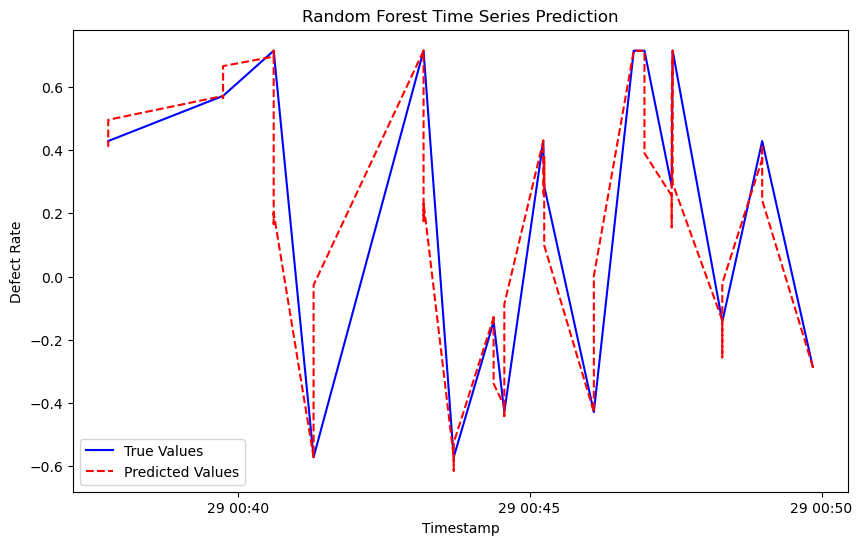

In [95]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='True Values', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Values', color='red', linestyle='--')
plt.xlabel('Timestamp')
plt.ylabel('Defect Rate')
plt.title('Random Forest Time Series Prediction')
plt.legend()
plt.show()

In [96]:
# Plot to visually compare the actual values of the defect rate with the predicted values over time.

### Visualizing and Displaying Feature Importances in Random Forest Model

In [102]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_10_features = feature_importances.head(10)


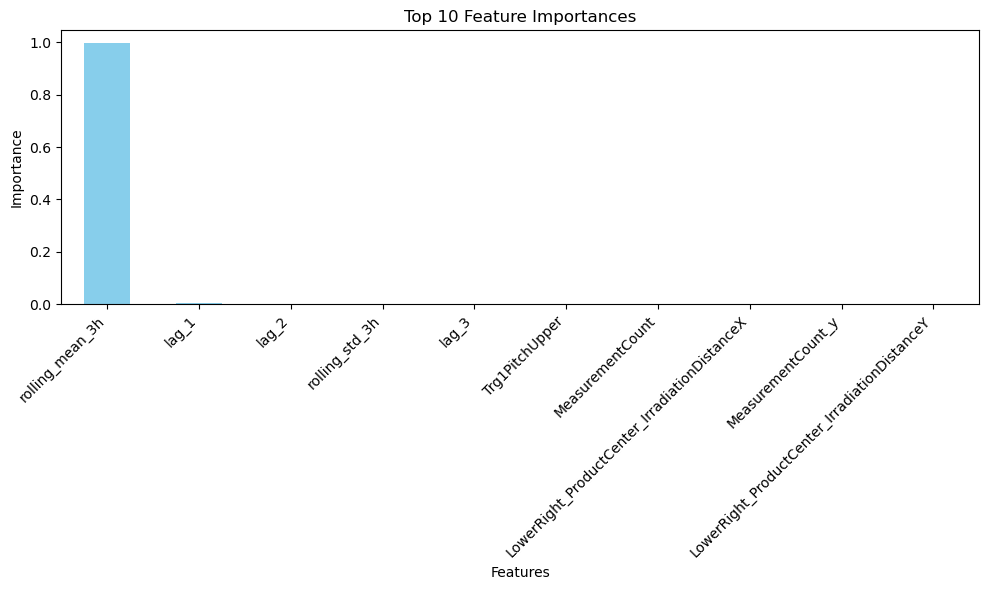

In [103]:
plt.figure(figsize=(10, 6))
top_10_features.plot(kind='bar', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [97]:
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

rolling_mean_3h                                  9.951662e-01
lag_1                                            4.397632e-03
lag_2                                            1.865995e-04
rolling_std_3h                                   8.888114e-05
lag_3                                            2.019112e-05
Trg1PitchUpper                                   7.107495e-06
MeasurementCount                                 6.017869e-06
LowerRight_ProductCenter_IrradiationDistanceX    5.564039e-06
MeasurementCount_y                               5.046577e-06
LowerRight_ProductCenter_IrradiationDistanceY    4.694902e-06
Trg2Terminal2CoreCenterDistance                  4.616985e-06
MeasurementCount_x                               4.469370e-06
Cam2LeftTerminalArea                             3.791436e-06
Trg2Terminal4CoreCenterDistance                  3.306681e-06
LowerRight_WireLength                            3.289944e-06
LowerRight_WireCenter_IrradiationPosition        3.276461e-06
Trg2Term

In [98]:
# This is to calculate and display the importance of each feature in predicting the defect rate using the random forest model.

###  Predicting the Defect Rates 7 days in Advance

In [101]:

last_row = df_f.iloc[-1:].copy()
predictions_7_days = []

for _ in range(7):
    last_row = last_row.replace([np.inf, -np.inf], np.nan)
    last_row = last_row.fillna(0)  
    pred = rf.predict(last_row.drop('Defect_Rate', axis=1))[0]
    predictions_7_days.append(pred)
    for lag in lags:
        last_row[f'lag_{lag}'] = last_row['Defect_Rate'].shift(1)[0] if lag != 1 else pred  
    last_row['rolling_mean_3h'] = last_row['Defect_Rate'].rolling(window=3).mean().iloc[-1]
    last_row['rolling_std_3h'] = last_row['Defect_Rate'].rolling(window=3).std().iloc[-1]
    last_row['hour'] = (last_row.index.hour + 1) % 24 
    last_row['dayofweek'] = (last_row.index.dayofweek + 1) % 7 
    last_row['Defect_Rate'] = pred
    
print("Predicted Defect Rates for the next 7 days:", predictions_7_days)


Predicted Defect Rates for the next 7 days: [0.41000000000003456, -0.034285714285714294, 0.019999999999999997, 0.019999999999999997, 0.019999999999999997, 0.019999999999999997, 0.019999999999999997]


In [ ]:
# Predicting the defect rates 7 days in advance 

### Visualization of Prediction Intervals

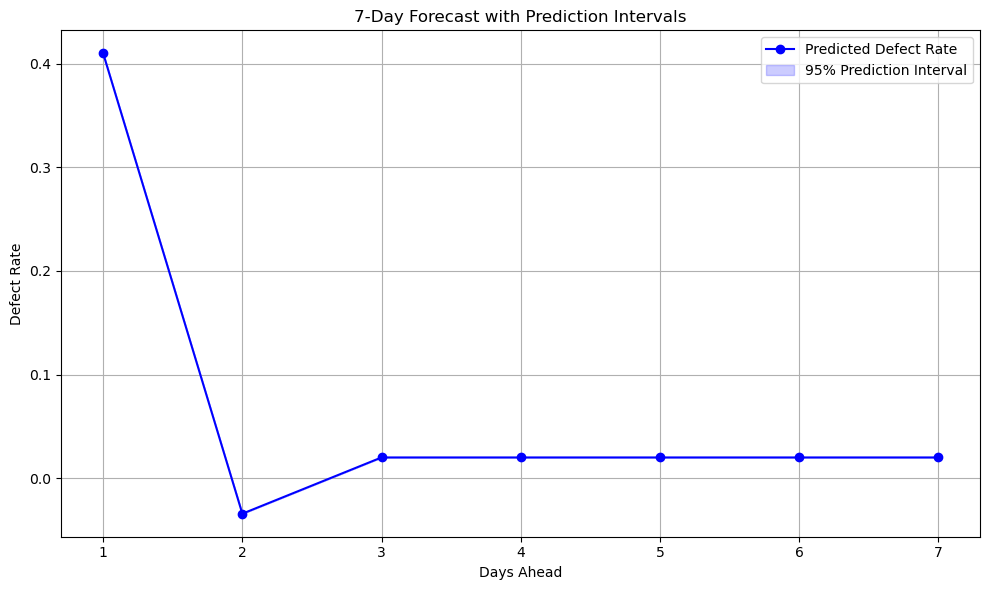

In [105]:
n_days = 7
predictions_7_days = []
lower_bound = []
upper_bound = []

last_row = df_f.iloc[-1:].copy()

for _ in range(n_days):
    last_row = last_row.replace([np.inf, -np.inf], np.nan)  
    last_row = last_row.fillna(0)  
    last_row = last_row.clip(lower=-1e10, upper=1e10) 
    
    tree_predictions = rf.predict(last_row.drop('Defect_Rate', axis=1))  
    predictions_7_days.append(np.mean(tree_predictions))

    lower_bound.append(np.percentile(tree_predictions, 2.5)) 
    upper_bound.append(np.percentile(tree_predictions, 97.5))  

    for lag in lags:
        last_row[f'lag_{lag}'] = last_row['Defect_Rate'].shift(1)[0] if lag != 1 else predictions_7_days[-1]  
    
    last_row['rolling_mean_3h'] = last_row['Defect_Rate'].rolling(window=3).mean().iloc[-1]
    last_row['rolling_std_3h'] = last_row['Defect_Rate'].rolling(window=3).std().iloc[-1]
    
    last_row['hour'] = (last_row.index.hour + 1) % 24  
    last_row['dayofweek'] = (last_row.index.dayofweek + 1) % 7 
    last_row['Defect_Rate'] = predictions_7_days[-1]


plt.figure(figsize=(10, 6))
plt.plot(range(1, n_days + 1), predictions_7_days, label="Predicted Defect Rate", color='blue', marker='o')
plt.fill_between(range(1, n_days + 1), lower_bound, upper_bound, color='blue', alpha=0.2, label="95% Prediction Interval")
plt.title("7-Day Forecast with Prediction Intervals")
plt.xlabel("Days Ahead")
plt.ylabel("Defect Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# plot for 7 day forecasting with prediction intervals 